Welcome to Vidya Data Analysis

1.press 1 to view  data in dataset 
2. press 2 to view a specific customer  
3. press 3 to for income tracker 
4. press 4 to view the loan eligible customers 
5. press 5 to view list of potential customers 
6. press 6 to view list of potential defaulters   
7 . press 7 for viewing loans in each category 
8 . press 8 for viewing loans greater than 1 lakh 
9 . press 9 for viewing customers with more expense 
10 . press 10 for viewing customers according to age 
11. press 11 to view plotting of data  
12. press 12 to exit
select your option  : 1
+-----------+---+------+-------------------+--------------+-----------+------+-----------+-------------+------------------+-----------+-------+------------+----------------+------------------+
|Customer_ID|Age|Gender|         Occupation|Marital Status|Family Size|Income|Expenditure|Use Frequency|     Loan Category|Loan Amount|Overdue| Debt Record| Returned Cheque| Dishonour of Bill|
+-----------+---+------+---------

select your option  : 3

1.press 1 to check income of customer between 0 to 50000 
2.press 2 to check income of customer between 50000 to 100000  
3. press 3 to check income of customer more than 100000 
Enter choice : 2
+-----------+-------------------+------+
|Customer_ID|         occupation|Income|
+-----------+-------------------+------+
|    IB14008|          PROFESSOR| 51000|
|    IB14012|            DENTIST| 58450|
|    IB14031|  SOFTWARE ENGINEER| 55999|
|    IB14032|       DATA ANALYST| 60111|
|    IB14041|ASSISTANT PROFESSOR| 50999|
|    IB14042|             DOCTOR| 60111|
|    IB14054|             DOCTOR| 60000|
|    IB14082|            TEACHER| 70000|
|    IB14089|          PROFESSOR| 62145|
|    IB14092|    SYSTEM ENGINEER| 52364|
|    1B14094|ASSISTANT PROFESSOR| 65214|
|    IB14099|             DOCTOR| 72154|
|    IB14104|    AIRPORT OFFICER| 80000|
|    IB14107|    ACCOUNT MANAGER|800000|
|    IB14111|  CORPORATE OFFICER| 52143|
|    IB14115|       BANK MANAGER| 64125|


select your option  : 9
+-----------+---+------+---------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|Customer_ID|Age|Gender|     Occupation|Marital Status|Family Size|Income|Expenditure|Use Frequency|Loan Category|Loan Amount|Overdue| Debt Record| Returned Cheque| Dishonour of Bill|
+-----------+---+------+---------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|    IB14158| 54|  MALE|AIRPORT OFFICER|       MARRIED|          6| 80000|      62541|            2|   AUTOMOBILE| 20,45,789 |      1|      16,599|               2|                 3|
|    IB14176| 54|  MALE|AIRPORT OFFICER|       MARRIED|          6| 80000|      62541|            2|      HOUSING| 20,45,789 |      1|      16,599|               2|                 3|
|    IB14204| 54|  MALE|AIRPORT OFFICER|       MARRIED| 

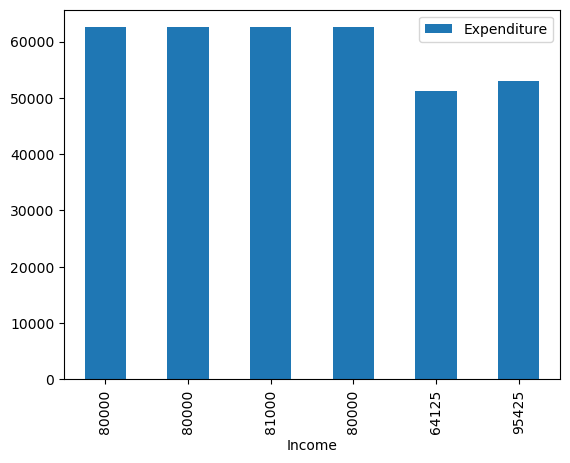

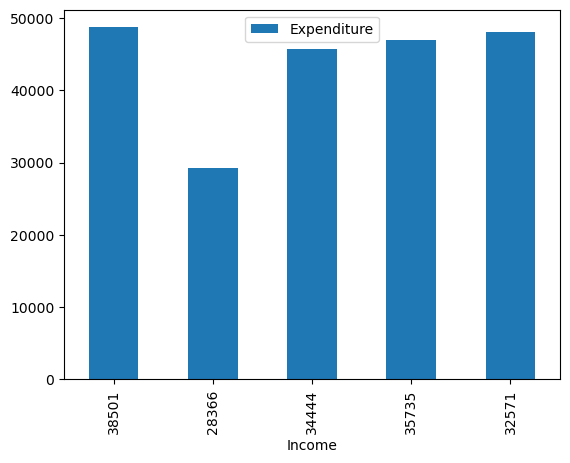

In [2]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *
import matplotlib as p 
import seaborn as s 
df = spark.read.csv("C:\\Users\\Yarasu Suresh Reddy\\loan (1).csv", inferSchema = True, header = True)

def mainmenu():
    print('Welcome to Vidya Data Analysis')
    choice = 0
    while True :
       
        print()
        print('1.press 1 to view  data in dataset ')
        print('2. press 2 to view a specific customer  ') 
        print('3. press 3 to for income tracker ')
        print('4. press 4 to view the loan eligible customers ')
        print('5. press 5 to view list of potential customers ')
        print("6. press 6 to view list of potential defaulters   ")
        print("7 . press 7 for viewing loans in each category ")
        print("8 . press 8 for viewing loans greater than 1 lakh ")
        print("9 . press 9 for viewing customers with more expense ")
        print("10 . press 10 for viewing customers according to age ")
        print("11. press 11 to view plotting of data  ")
        print("12. press 12 to exit")
        
        choice = int(input('select your option  : '))
        
        if choice == 1:
            showalldata()
        elif choice == 2:
            viewspecificcustomer()
        elif choice == 3:
            incometracker()
        elif choice == 4:
            loaneligibility()
        elif choice == 5:
            listofpotentialcustomers()
        elif choice == 6:
            listofpotentialdefaulters() 
        elif choice == 7:
            loansineachcategory() 
        elif choice == 8 :
             bigloans() 
        elif choice == 9 :
            moreexpense()
        elif choice == 10 :
            agetracker()
        elif choice == 11 :
            plotting()
        elif choice == 12 :
        
            print("Thank you for using Vidya analysis ")
            break
        
            
        else:
            print('Invalid Option !!!')
            print('Please Select A Valid Option')
            print()
            input('Press Enter To Continue...')
def showalldata():
              
                df.show()
            
def viewspecificcustomer() :
             inp = input("Enter customer id to view customer ")
             df.select("Customer_ID", "Age", "Occupation", "Marital Status", "Income").filter(df.Customer_ID==inp).show()

def incometracker() :
            while True :
                  print()
                  print('1.press 1 to check income of customer between 0 to 50000 ')
                  print('2.press 2 to check income of customer between 50000 to 100000  ')
                  print('3. press 3 to check income of customer more than 100000 ')
                  ch = int(input("Enter choice : "))
                  if ch == 1 :
                        df.select("Customer_ID" , "occupation","Income").filter(df["Income"]<"50000").show(100)
                        break
                  elif ch == 2 :
                        df.select("Customer_ID" , "occupation",'Income').filter(df["Income"]>"50000").show(100)
                        break
                  elif ch == 3 :
                        df.select("Customer_ID" , "occupation","Income").filter(df["Income"]>"100000").show(100)
                        break
                  elif ch >= 4 :
                        print("please choose correct option ")
                        break
def loaneligibility() :
    print(" Eligible Customers are : ")
    print()
    df.select("Customer_ID","Occupation","Family Size","Income","Expenditure","Overdue").filter((df["Expenditure"]>df["Income"])).show()
    
def listofpotentialcustomers() :
    print("List of potential non defaulter customers ")
    print()
    df.select("Customer_ID","Occupation","Income","Expenditure","Overdue").filter((df["Income"]> df["Expenditure"]) & (df["Income"] > '50000') & (df["Overdue"]<=5)).show(50)
    
def listofpotentialdefaulters() :
    print("List of potential defaulters : ")
    df.select("Income" ,"Expenditure").filter((df[" Returned Cheque"]>"1") & (df["Overdue"]>"1") & (df["Expenditure"] > df["Income"])).show()
def loansineachcategory() :
    df.groupBy("Loan Category").count().orderBy("count", ascending = False).show()
def bigloans():
    df.filter(df["Loan Amount"]>"1,00,000").show()
def moreexpense():
    df.filter((df["Expenditure"]>"50000")).show()
def agetracker() :
    inp = int(input("enter age to tract customers "))
    df.select("Customer_ID", "Age", "Occupation", "Marital Status", "Income").filter(df.Age==inp).show()
def plotting() :
    while True :
            print(" press 1  to View chart for customare eligible for loans ")
            print("press 2 to view chart for potential defaulters ")
            ch = int(input("Enter a number to view charting "))
            
            if ch == 1 :
                a = df.select("Expenditure","Income").filter((df["Income"]> df["Expenditure"]) & (df["Expenditure"] > '50000')).toPandas()
                a.plot(x = "Income", y = "Expenditure" , kind = "bar")
                break
            elif ch == 2 :
                a = df.select("Income" ,"Expenditure").filter((df[" Returned Cheque"]>"1") & (df["Overdue"]>"1") & (df["Expenditure"] > df["Income"])).toPandas() 
                a.plot(x = "Income", y = "Expenditure" , kind = "bar")
            else :
                break
            break
mainmenu()